In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from keras.models import Model, Sequential
from keras.layers import Input, Dense

Using TensorFlow backend.


## Keras
https://keras.io/

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:

Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
Supports both convolutional networks and recurrent networks, as well as combinations of the two.
Runs seamlessly on CPU and GPU.
Read the documentation at Keras.io.

Keras is compatible with: Python 2.7-3.6.

#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras
#https://elitedatascience.com/keras-tutorial-deep-learning-in-python

https://gist.github.com/kmclaugh/0a377ee8a8126fdfde4e6b7d237bfb4f
https://www.tensorflow.org/tutorials/keras/basic_regression

Fit a simple function like the square root

  $$y = \sqrt(x)$$
  
using a single input.

In [2]:
# generate a set of scalar input and scalar output values
#
x = np.linspace(0.0, 9.0, 99)
y = np.sqrt(x)

In [3]:
# create model
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear')) #sigmoid'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [7]:
model.fit(x,y, epochs=150, batch_size=10)

Epoch 1/150
99/99 [==============================] - 0s 151us/step - loss: 0.0024
Epoch 2/150
99/99 [==============================] - 0s 172us/step - loss: 0.0024
Epoch 3/150
99/99 [==============================] - 0s 172us/step - loss: 0.0024
Epoch 4/150
99/99 [==============================] - 0s 182us/step - loss: 0.0025
Epoch 5/150
99/99 [==============================] - 0s 182us/step - loss: 0.0026
Epoch 6/150
99/99 [==============================] - 0s 182us/step - loss: 0.0026
Epoch 7/150
99/99 [==============================] - 0s 162us/step - loss: 0.0025
Epoch 8/150
99/99 [==============================] - 0s 172us/step - loss: 0.0025
Epoch 9/150
99/99 [==============================] - 0s 162us/step - loss: 0.0024
Epoch 10/150
99/99 [==============================] - 0s 172us/step - loss: 0.0025
Epoch 11/150
99/99 [==============================] - 0s 172us/step - loss: 0.0025
Epoch 12/150
99/99 [==============================] - 0s 141us/step - loss: 0.0025
Epoch 13/150


The result looks like a piece-wise linear fit with three segments.

It might be interesting to try adding more hidden layers to see if that adds more segments.

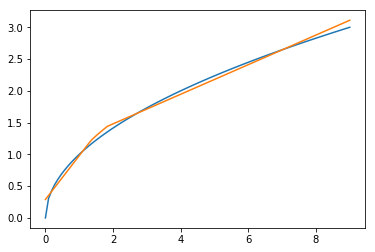

In [109]:
yp = model.predict(x).reshape(-1)
plt.plot(x, np.sqrt(x))
plt.plot(x, yp)

Try representing each input value as a bit array and try to fit integer square roots.

In [32]:
# convert integers into arrays of bits
#
bitval = lambda x :[int(c) for c in '0000000'+bin(x)[2:]][-8:]
bin(2), bitval(2)

('0b10', [0, 0, 0, 0, 0, 0, 1, 0])

In [113]:
x = np.arange(256)
xx = np.array([bitval(b) for b in x])
y = np.sqrt( x ).astype(np.int)
yy = np.array([bitval(b) for b in y])[:,-4:]
yy.shape, yy[100:205:16,:]

((256, 4), array([[1, 0, 1, 0],
        [1, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 0, 0],
        [1, 1, 0, 1],
        [1, 1, 1, 0]]))

In [117]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam')

model.fit(xx, y, epochs=150, batch_size=10)

Epoch 1/150
256/256 [==============================] - 1s 2ms/step - loss: 106.6896
Epoch 2/150
256/256 [==============================] - 0s 129us/step - loss: 93.0313
Epoch 3/150
256/256 [==============================] - 0s 121us/step - loss: 75.9344
Epoch 4/150
256/256 [==============================] - 0s 125us/step - loss: 55.8579
Epoch 5/150
256/256 [==============================] - 0s 125us/step - loss: 35.8263
Epoch 6/150
256/256 [==============================] - 0s 113us/step - loss: 21.6472
Epoch 7/150
256/256 [==============================] - 0s 121us/step - loss: 16.1576
Epoch 8/150
256/256 [==============================] - 0s 132us/step - loss: 14.1468
Epoch 9/150
256/256 [==============================] - 0s 121us/step - loss: 12.4686
Epoch 10/150
256/256 [==============================] - 0s 113us/step - loss: 10.8672
Epoch 11/150
256/256 [==============================] - 0s 101us/step - loss: 9.3059
Epoch 12/150
256/256 [==============================] - 0s 124us/

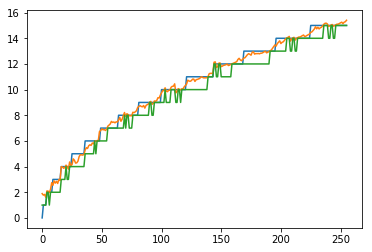

In [120]:
yp = model.predict(xx).reshape(-1)
yp[0:12]
plt.plot(x, y)
plt.plot(x, yp)
#plt.plot(x, yp.astype(np.int) )

Try 8-bits of input a 4-bits of output.

In [122]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

# Compile model
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam')

model.fit(xx, yy, epochs=150, batch_size=10)

Epoch 1/150
256/256 [==============================] - 1s 3ms/step - loss: 0.2525
Epoch 2/150
256/256 [==============================] - 0s 125us/step - loss: 0.2464
Epoch 3/150
256/256 [==============================] - 0s 132us/step - loss: 0.2419
Epoch 4/150
256/256 [==============================] - 0s 129us/step - loss: 0.2373
Epoch 5/150
256/256 [==============================] - 0s 129us/step - loss: 0.2331
Epoch 6/150
256/256 [==============================] - 0s 144us/step - loss: 0.2285
Epoch 7/150
256/256 [==============================] - 0s 133us/step - loss: 0.2232
Epoch 8/150
256/256 [==============================] - 0s 132us/step - loss: 0.2184
Epoch 9/150
256/256 [==============================] - 0s 117us/step - loss: 0.2145
Epoch 10/150
256/256 [==============================] - 0s 125us/step - loss: 0.2111
Epoch 11/150
256/256 [==============================] - 0s 129us/step - loss: 0.2077
Epoch 12/150
256/256 [==============================] - ETA: 0s - loss: 0.20

Epoch 97/150
256/256 [==============================] - 0s 117us/step - loss: 0.0224
Epoch 98/150
256/256 [==============================] - 0s 113us/step - loss: 0.0221
Epoch 99/150
256/256 [==============================] - 0s 101us/step - loss: 0.0221
Epoch 100/150
256/256 [==============================] - 0s 109us/step - loss: 0.0222
Epoch 101/150
256/256 [==============================] - 0s 105us/step - loss: 0.0217
Epoch 102/150
256/256 [==============================] - 0s 109us/step - loss: 0.0218
Epoch 103/150
256/256 [==============================] - 0s 109us/step - loss: 0.0212
Epoch 104/150
256/256 [==============================] - 0s 105us/step - loss: 0.0212
Epoch 105/150
256/256 [==============================] - ETA: 0s - loss: 0.005 - 0s 105us/step - loss: 0.0210
Epoch 106/150
256/256 [==============================] - 0s 113us/step - loss: 0.0208
Epoch 107/150
256/256 [==============================] - 0s 105us/step - loss: 0.0204
Epoch 108/150
256/256 [==========

In [127]:
yp = model.predict(xx)
yp.shape
#print(yy[50:62,:], yp[5:62,:])
#plt.plot(x, y)
#plt.plot(x, yp)
#yy.shape

(256, 4)

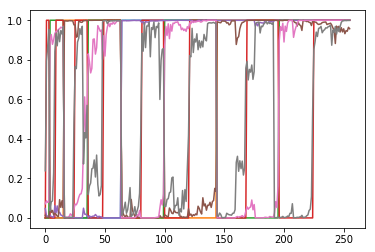

In [135]:
plt.plot(yy)
plt.plot(yp)

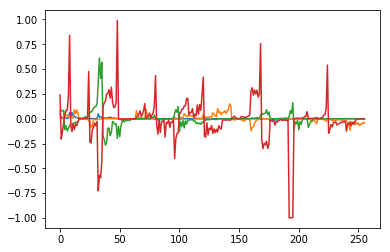

In [136]:
plt.plot(yp -yy)

### Next steps?
#### Hyperparameter optimization
#### sqrt applied to binary representation of float (unlikely to work)